In [18]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('https://starlab-public.s3.amazonaws.com/work_sample/predictive_maintenance.csv')

In [3]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [4]:
df_minority=df[df['failure']==1]
df_majority=df[df['failure']==0]

In [5]:
#upsampling 
from sklearn.utils import resample

In [6]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)


In [7]:
df_minority_upsample.shape

(124388, 12)

In [8]:
df_upsampled=pd.concat([df_majority,df_minority_upsample])

In [10]:
df_upsampled.shape

(248776, 12)

In [11]:
# Smote

In [12]:
!pip install imblearn

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [20]:
plt.scatter(df[[  'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']],c=df['failure'])

TypeError: scatter() missing 1 required positional argument: 'y'

In [16]:
oversample=SMOTE()
X,y=oversample.fit_resample(df[[ 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']],df['failure'])

In [21]:
X.shape

(248776, 9)

In [1]:
# Data interpolation

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])


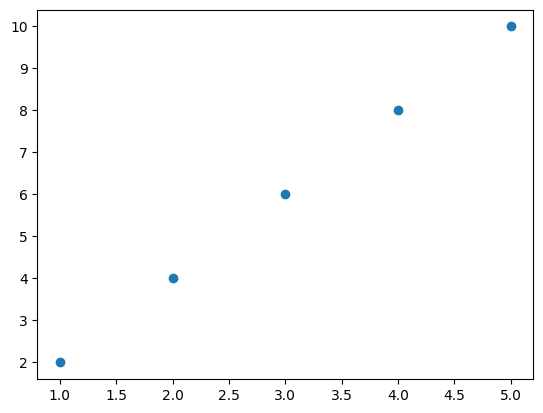

In [5]:
plt.scatter(x=x,y=y)

In [6]:
x_new=np.linspace(1,5,10)
y_interp=np.interp(x_new,x,y)

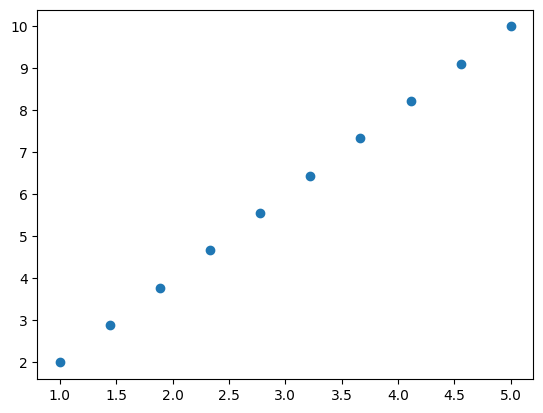

In [8]:
plt.scatter(x_new,y_interp)